<a href="https://colab.research.google.com/github/Tejasaisathwik/-I/blob/main/Mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dt = pd.read_csv('/Mall_Customers.csv')

In [ ]:
dt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x = dt.iloc[:,3:]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

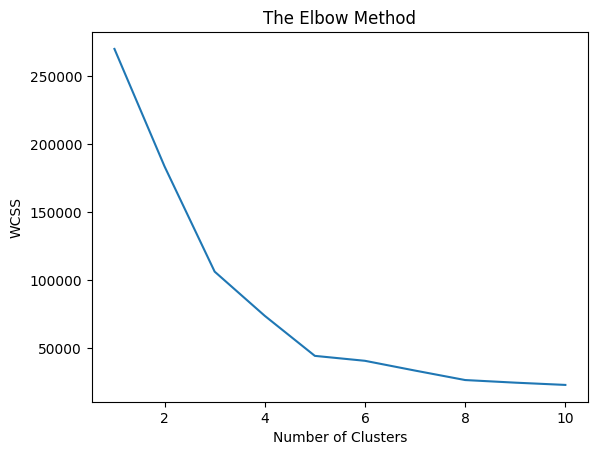

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [ ]:
labels = kmeans.labels_
dt['cluster'] = labels

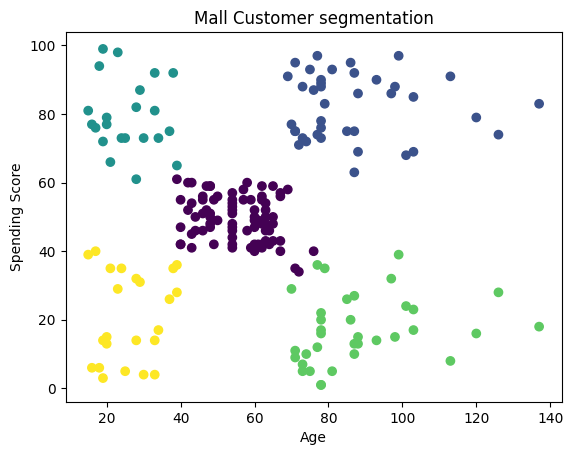

In [ ]:
plt.scatter(dt['Annual Income (k$)'],dt['Spending Score (1-100)'],c=dt['cluster'])
plt.title('Mall Customer segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()